**Energy Consumption For PJM Interconnection LLC**

https://www.kaggle.com/robikscube/hourly-energy-consumption

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Import all .csv of PJM Energy Consumption**

In [2]:
#load datasets, set index as "Datetime", add categorical column "Utility"
AEP = pd.read_csv("AEP_hourly.csv").set_index("Datetime")
AEP.index = pd.to_datetime(AEP.index)
AEP = AEP.groupby(pd.Grouper(freq="D")).mean()

COMED = pd.read_csv("COMED_hourly.csv").set_index("Datetime")
COMED.index = pd.to_datetime(COMED.index)
COMED = COMED.groupby(pd.Grouper(freq="D")).mean()

DAYTON = pd.read_csv("DAYTON_hourly.csv").set_index("Datetime")
DAYTON.index = pd.to_datetime(DAYTON.index)
DAYTON = DAYTON.groupby(pd.Grouper(freq="D")).mean()

DEOK = pd.read_csv("DEOK_hourly.csv").set_index("Datetime")
DEOK.index = pd.to_datetime(DEOK.index)
DEOK = DEOK.groupby(pd.Grouper(freq="D")).mean()

DOM = pd.read_csv("DOM_hourly.csv").set_index("Datetime")
DOM.index = pd.to_datetime(DOM.index)
DOM = DOM.groupby(pd.Grouper(freq="D")).mean()

DUQ = pd.read_csv("DUQ_hourly.csv").set_index("Datetime")
DUQ.index = pd.to_datetime(DUQ.index)
DUQ = DUQ.groupby(pd.Grouper(freq="D")).mean()

EKPC = pd.read_csv("EKPC_hourly.csv").set_index("Datetime")
EKPC.index = pd.to_datetime(EKPC.index)
EKPC = EKPC.groupby(pd.Grouper(freq="D")).mean()

FE = pd.read_csv("FE_hourly.csv").set_index("Datetime")
FE.index = pd.to_datetime(FE.index)
FE = FE.groupby(pd.Grouper(freq="D")).mean()

NI = pd.read_csv("NI_hourly.csv").set_index("Datetime")
NI.index = pd.to_datetime(NI.index)
NI = NI.groupby(pd.Grouper(freq="D")).mean()

PJM = pd.read_csv("PJM_Load_hourly.csv").set_index("Datetime")
PJM.index = pd.to_datetime(PJM.index)
PJM = PJM.groupby(pd.Grouper(freq="D")).mean()

PJME = pd.read_csv("PJME_hourly.csv").set_index("Datetime")
PJME.index = pd.to_datetime(PJME.index)
PJME = PJME.groupby(pd.Grouper(freq="D")).mean()

PJMW = pd.read_csv("PJMW_hourly.csv").set_index("Datetime")
PJMW.index = pd.to_datetime(PJMW.index)
PJMW = PJMW.groupby(pd.Grouper(freq="D")).mean()

**Concatenate dataframes**

In [3]:
#combine dataframes horizontally with "Datetime as index"
df_all = pd.concat([AEP,COMED,DAYTON, DEOK,DOM, DUQ, EKPC, FE, NI, PJM, PJME, PJMW], axis=1)
df_all.head()

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
Datetime,,,,,,,,,,,,
1998-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27813.739130,NaN,NaN
1998-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26605.791667,NaN,NaN
1998-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25672.333333,NaN,NaN
1998-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24487.083333,NaN,NaN
1998-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23487.565217,NaN,NaN


In [4]:
df_all.tail()

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
Datetime,,,,,,,,,,,,
2018-07-30,15368.083333,12354.958333,2026.333333,3359.333333,11738.958333,1685.708333,1527.541667,8077.625000,NaN,NaN,32957.416667,5492.708333
2018-07-31,15180.291667,12330.541667,2051.083333,3405.250000,12287.000000,1734.791667,1517.583333,8150.291667,NaN,NaN,34539.083333,5660.750000
2018-08-01,15151.166667,12820.416667,2060.291667,3345.375000,13579.708333,1741.375000,1450.166667,8183.000000,NaN,NaN,39230.791667,5959.708333
2018-08-02,15687.666667,13735.041667,2168.208333,3471.083333,12962.333333,1736.125000,1493.250000,8569.750000,NaN,NaN,39593.041667,5805.041667
2018-08-03,14809.000000,13335.000000,2042.000000,3281.000000,11385.000000,1656.000000,1448.000000,8198.000000,NaN,NaN,35486.000000,5489.000000


*Consider starting at 2012-01-01 and going through most recent Datetime*

*Most recent (latest) datetime log is 2018-08-03*

*subset dataframe for a timeframe with a union of dates*

In [5]:
#review summary statistics of utility groups
df_all.describe()

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW
count,5055.000000,2772.000000,5055.000000,2407.000000,4843.000000,4963.000000,1890.000000,2621.000000,2437.000000,1372.000000,6059.000000,5969.000000
mean,15499.169905,11420.655150,2037.800695,3105.140534,10949.057392,1658.789893,1464.221759,7792.266017,11700.497916,29766.206931,32080.026735,5602.278276
std,1970.540706,1722.275860,292.371960,442.034425,1770.178920,220.406733,307.126544,962.067325,1737.431927,4048.777802,4686.484020,737.718836
min,11078.041667,8148.750000,1366.333333,1219.000000,7772.000000,1188.166667,601.958333,5685.291667,8256.583333,21258.347826,19769.041667,3018.041667
25%,14070.020833,10249.916667,1830.562500,2763.458333,9454.395833,1506.791667,1231.708333,7159.750000,10570.916667,27099.802083,28627.854167,5043.875000
50%,15272.458333,11095.645833,2006.583333,3036.916667,10706.208333,1625.291667,1412.187500,7666.083333,11397.666667,29071.250000,31359.708333,5522.458333
75%,16801.229167,12288.364583,2228.541667,3404.375000,12202.250000,1781.666667,1601.770833,8406.291667,12600.416667,32122.885417,34972.520833,6086.000000
max,22847.875000,19920.291667,3136.625000,4503.458333,18976.625000,2589.000000,2987.208333,11753.416667,20046.750000,45610.041667,52229.833333,8794.583333


**Visualize a timeseries for all columns (utility groups)**

Text(0.5, 1.0, 'Timeseries of Utility Groups Energy Consumption')

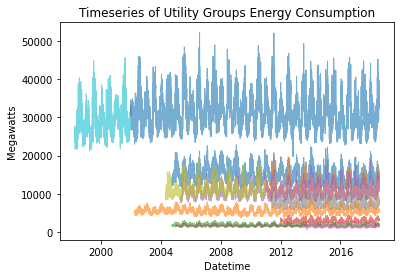

In [6]:
#plot a timeseries with all columns
plt.plot(df_all, linewidth=1,alpha=0.6)
plt.xlabel("Datetime")
plt.ylabel("Megawatts")
plt.title("Timeseries of Utility Groups Energy Consumption")

In [7]:
#subset for date range from 2012-01-01 through 2017-12-31
df_subset = df_all[(df_all.index.get_level_values(0) >= "2012-01-01") & (df_all.index.get_level_values(0) <= "2017-12-31")]

In [8]:
df_subset.head()
df_subset.tail()

#review first, but likely drop columns 
#this would give an entire 6-year range with 10-utility groups
df_subset.columns

df = df_subset[['AEP_MW', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 'DOM_MW', 'DUQ_MW',
                'FE_MW', 'PJME_MW', 'PJMW_MW']]

In [9]:
df.isna().sum()  #EKPC has missing values: drop or fill?

AEP_MW       0
COMED_MW     0
DAYTON_MW    0
DEOK_MW      0
DOM_MW       0
DUQ_MW       0
FE_MW        0
PJME_MW      0
PJMW_MW      0
dtype: int64

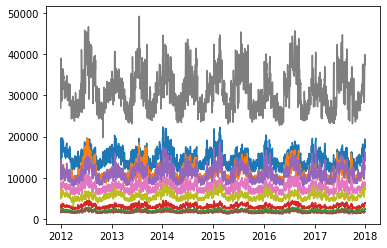

In [10]:
#plot with both PJME_MW and PJMW_MW
plt.plot(df)

<AxesSubplot:xlabel='PJMW_MW', ylabel='Density'>

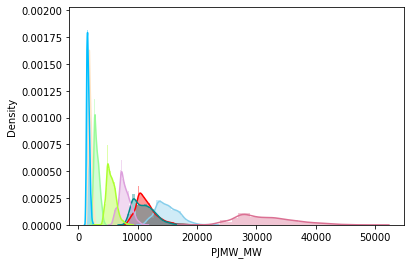

In [11]:
sns.distplot(df['AEP_MW'], color="skyblue", label="AEP")
sns.distplot(df['COMED_MW'], color="red", label="COMED")
sns.distplot(df['DAYTON_MW'], color="bisque", label="DAYTON")
sns.distplot(df['DEOK_MW'], color="palegreen", label="DEOK")
sns.distplot(df['DOM_MW'], color="darkcyan", label="DOM")
sns.distplot(df['DUQ_MW'], color="deepskyblue", label="DUQ")
sns.distplot(df['FE_MW'], color="plum", label="FE")
sns.distplot(df['PJME_MW'], color="palevioletred", label="PJME")
sns.distplot(df['PJMW_MW'], color="greenyellow", label="PJMW")


<AxesSubplot:xlabel='PJMW_MW', ylabel='Density'>

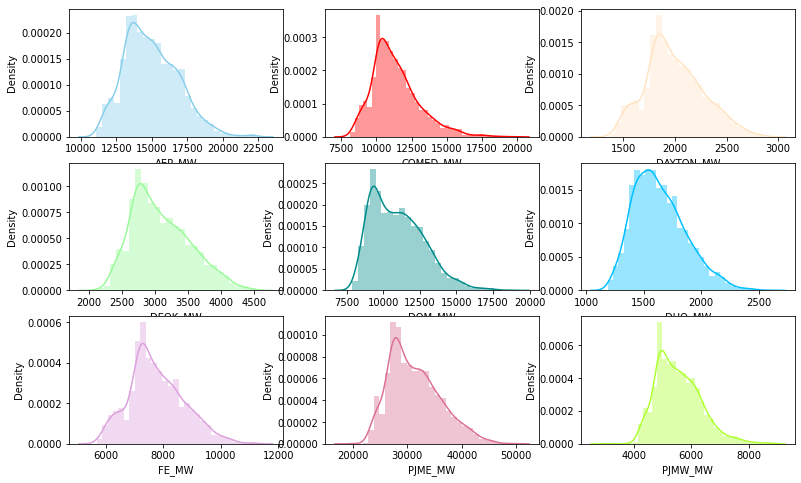

In [12]:
f, axes = plt.subplots(3,3, figsize=(13,8))
sns.distplot(df['AEP_MW'], color="skyblue", label="AEP", ax=axes[0,0])
sns.distplot(df['COMED_MW'], color="red", label="COMED", ax=axes[0,1])
sns.distplot(df['DAYTON_MW'], color="bisque", label="DAYTON", ax=axes[0,2])
sns.distplot(df['DEOK_MW'], color="palegreen", label="DEOK", ax=axes[1,0])
sns.distplot(df['DOM_MW'], color="darkcyan", label="DOM",ax=axes[1,1])
sns.distplot(df['DUQ_MW'], color="deepskyblue", label="DUQ", ax=axes[1,2])
sns.distplot(df['FE_MW'], color="plum", label="FE", ax=axes[2,0])
sns.distplot(df['PJME_MW'], color="palevioletred", label="PJME", ax=axes[2,1])
sns.distplot(df['PJMW_MW'], color="greenyellow", label="PJMW", ax=axes[2,2])


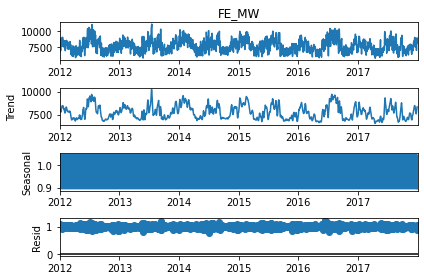

In [13]:
#perform season_decompose for a signle variable (column)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['FE_MW'], model='multiplicative')
result.plot()
plt.show()

In [14]:
#Combine datasets of columns into a summed row per day (tidy dataframe)
#PJME and PJMEW are groupings of utility companies; do not include in dataframe
df.head()

df_summed = df
df_summed.head()

df_summed["Total_MW"] = df["AEP_MW"] + df["COMED_MW"] + df["DAYTON_MW"] + df["DEOK_MW"] + df["DOM_MW"] + df["DUQ_MW"] + df["FE_MW"] 

df_summed.head()

df_summed = df_summed[['Total_MW']]
df_summed.head()

,Total_MW
Datetime,
2012-01-01,46188.163043
2012-01-02,53148.583333
2012-01-03,62387.958333
2012-01-04,62386.708333
2012-01-05,56627.500000


<AxesSubplot:xlabel='Datetime'>

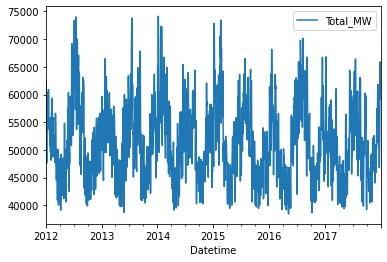

In [15]:
df_summed.plot()

**Histogram showing distribution of Megawatts/day**

<AxesSubplot:ylabel='Density'>

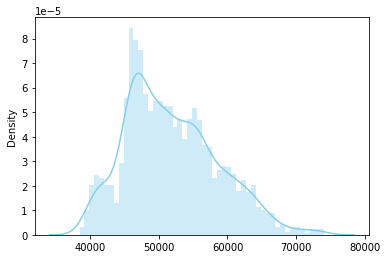

In [16]:
sns.distplot(df_summed, color="skyblue", label="Total MW", bins=50)

<AxesSubplot:xlabel='Datetime'>

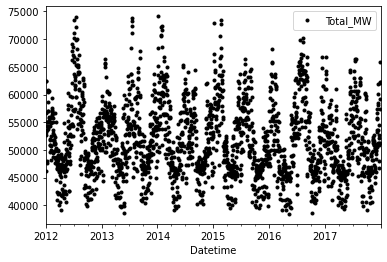

In [17]:
df_summed.plot(style="k.")

<AxesSubplot:xlabel='Total_MW'>

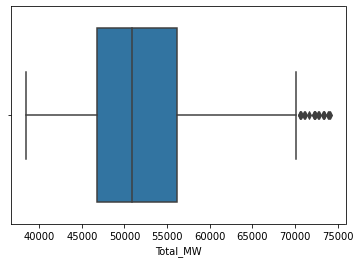

In [18]:
sns.boxplot(x=df_summed["Total_MW"])

Text(0.5, 1.0, 'Megawatts Per Year')

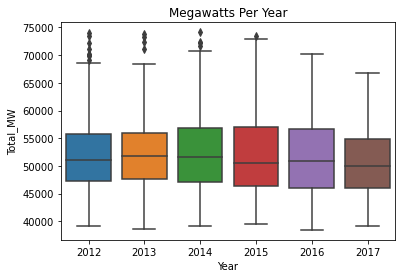

In [19]:
df_year = df_summed
df_year['Year'] = df_year.index.year
ax = sns.boxplot(data=df_year, x='Year', y='Total_MW')
plt.title("Megawatts Per Year")

In [24]:
df_summed= df_summed[['Total_MW']]
df_summed.head()

,Total_MW
Datetime,
2012-01-01,46188.163043
2012-01-02,53148.583333
2012-01-03,62387.958333
2012-01-04,62386.708333
2012-01-05,56627.500000


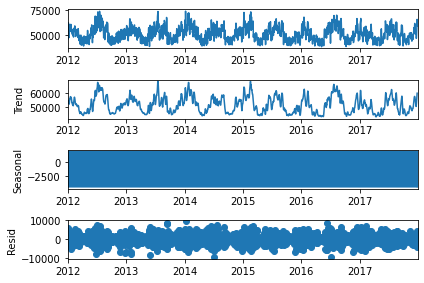

<Figure size 432x288 with 0 Axes>

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_summed)
result.plot()
plt.show()
plt.tight_layout()

**ADFuller Testing - Stationarity**

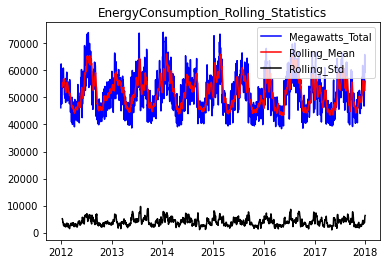

Result: Dicky-Fuller Test
Test Statistics                  -4.372127
p-value                           0.000332
No. of lags used                 26.000000
Number of observations used    2165.000000
critical value (1%)              -3.433374
critical value (5%)              -2.862876
critical value (10%)             -2.567481
dtype: float64


In [26]:
#evaluating stationarity of timeseries
#Augemented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #plot rolling stats
    plt.plot(timeseries, color='blue', label = "Megawatts_Total")
    plt.plot(rolmean, color='red',label='Rolling_Mean')
    plt.plot(rolstd, color="black", label='Rolling_Std')
    plt.legend(loc='best')
    plt.title("EnergyConsumption_Rolling_Statistics")
    plt.show(block=False)
    
    #Dicky-Fuller Test
    print("Result: Dicky-Fuller Test")
    adft = adfuller(df_summed['Total_MW'], autolag="AIC")
    output = pd.Series(adft[0:4], index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)
test_stationarity(df_summed)

*p-value <0.05*

*Reject the null-hypothesis and support stationarity*

In [27]:
#export df_summed dataframe
EnergyConsumption_df = df_summed
EnergyConsumption_df.to_csv("EnergyConsumption_df.csv")